In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
%matplotlib inline

In [4]:
tickers = pd.read_html('https://ournifty.com/stock-list-in-nse-fo-futures-and-options.html#:~:text=NSE%20F%26O%20Stock%20List%3A%20%20%20%20SL,%20%201000%20%2052%20more%20rows%20')[0]
tickers = tickers.SYMBOL.to_list()

In [5]:
for count in range(len(tickers)):
    tickers[count] = tickers[count] + ".NS"

In [16]:
startdate = '2023-10-01'

enddate = datetime.now().date()

min_avg_return,max_st_dev = 0.1 , 0.07

return_period_weeks = 4

In [17]:
tickers

['MIDCPNIFTY.NS',
 'FINNIFTY.NS',
 'BANKNIFTY.NS',
 'NIFTY.NS',
 'AARTIIND.NS',
 'ABB.NS',
 'ABBOTINDIA.NS',
 'ACC.NS',
 'ADANIENT.NS',
 'ADANIPORTS.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ALKEM.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUBANK.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BATAINDIA.NS',
 'BERGEPAINT.NS',
 'BEL.NS',
 'BHARATFORG.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BHEL.NS',
 'BIOCON.NS',
 'BSOFT.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CANFINHOME.NS',
 'CANBK.NS',
 'CHAMBLFERT.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'CUB.NS',
 'COALINDIA.NS',
 'COFORGE.NS',
 'COLPAL.NS',
 'CONCOR.NS',
 'COROMANDEL.NS',
 'CROMPTON.NS',
 'CUMMINSIND.NS',
 'DABUR.NS',
 'DALBHARAT.NS',
 'DEEPAKNTR.NS',
 'DELTACORP.NS',
 'DIVISLAB.NS',
 'DIXON.NS',
 'DLF.NS',
 'LALPATHLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.

In [18]:
def stock_analysis(ticker,startdate,enddate,return_period_weeks):
    try:
        price_data = yf.download(ticker , start = startdate, end = enddate)['Close']
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return -np.inf, np.inf, None
    

    pct_return_after_period = []
    buy_dates = []

    for buy_date,buy_price in price_data.items():
        sell_date = buy_date + timedelta(weeks=return_period_weeks)

        try:
            sell_price = price_data[price_data.index == sell_date].iloc[0]
            #trying to sell on non trading days
        except IndexError:
            continue

        pct_change = (sell_price - buy_price)/buy_price

        pct_return_after_period.append(pct_change)
        buy_dates.append(buy_date)
        
    if len(pct_return_after_period) == 0:
        return -np.inf,np.inf,None
    else:
        return np.mean(pct_return_after_period),np.std(pct_return_after_period), [buy_dates, pct_return_after_period]


In [19]:
def plot_analysis(titles,ticker,startdate,enddate,all_returns):
    prices = yf.download(ticker,startdate,enddate)['Close']
    prices.index = [d.date() for d in prices.index]

    plt.figure(figsize=(10, 6))

    plt.subplot(2,1,1)  
    plt.plot(prices)
    plt.title(titles[0],fontsize = 12)
    plt.ylabel('Price (Rs)', fontsize=14)

    plt.subplot(2,1,2)  

    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=12)
    plt.ylabel('Pct. Return', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')

    plt.show()

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MIDCPNIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



avg_return : -inf | dev_return : inf
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FINNIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



avg_return : -inf | dev_return : inf
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BANKNIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



avg_return : -inf | dev_return : inf
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NIFTY.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



avg_return : -inf | dev_return : inf
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.11116971311266863 | dev_return : 0.07291101686178311
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.06433371333747329 | dev_return : 0.048173499251756235
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.0027540472562775182 | dev_return : 0.0449969338786602
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.05110242581333073 | dev_return : 0.11064702527086057
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.09466778775347455 | dev_return : 0.16534800917726974
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.12763635134175932 | dev_return : 0.13419759435111767
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.03055012637419782 | dev_return : 0.027251152287973892

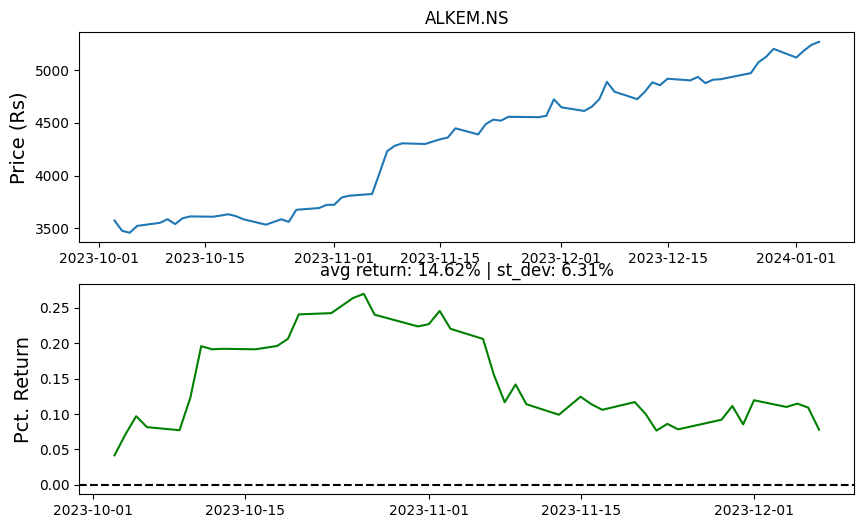

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08424908435937163 | dev_return : 0.10851611267051835
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.048421421322591474 | dev_return : 0.048562757004611296
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.07107923002658176 | dev_return : 0.05027890606111712
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.007034726094257008 | dev_return : 0.038449411290038205
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.02948389538836248 | dev_return : 0.04466925461073377
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.007313980819616175 | dev_return : 0.04072403924327606
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.017073802714065268 | dev_return : 0.05393174836947639
[*********************100%%********

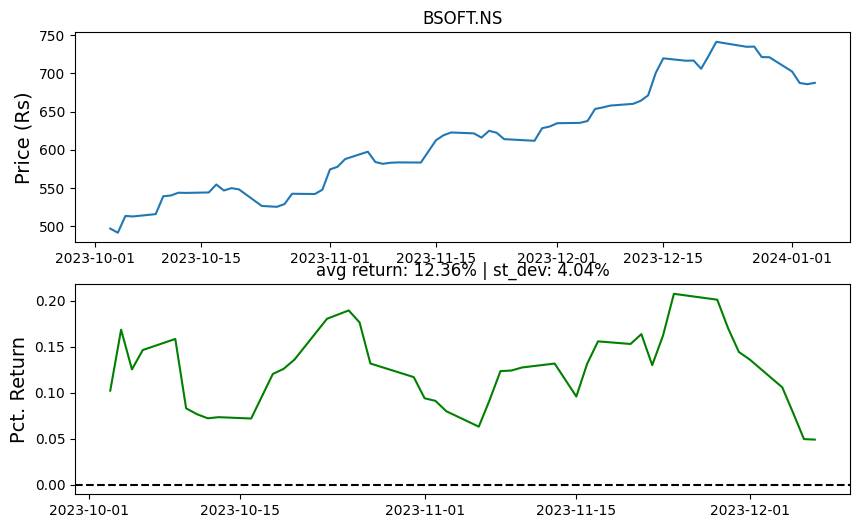

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.04622131149872717 | dev_return : 0.04741374741039176
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.049218779241163996 | dev_return : 0.031335585349986664
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.012945001221456079 | dev_return : 0.034666391111911214
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.07614882858081456 | dev_return : 0.036039502876910955
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.108317516292052 | dev_return : 0.0491166899179748
[*********************100%%**********************]  1 of 1 completed


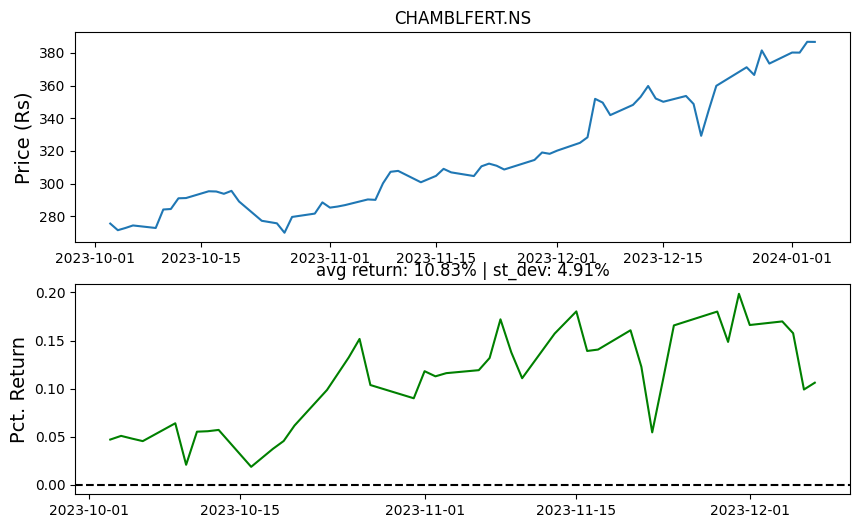

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.012422554303006327 | dev_return : 0.07510899589805473
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.02219479784787959 | dev_return : 0.03301356200648891
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.061608605829135285 | dev_return : 0.04337245024484596
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.0782414062311008 | dev_return : 0.03545263080036063
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08203811809314647 | dev_return : 0.05695301044674906
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.0727420527259376 | dev_return : 0.031257991082336505
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08460755869729575 | dev_return : 0.051467361575802166
[*********************100%%************

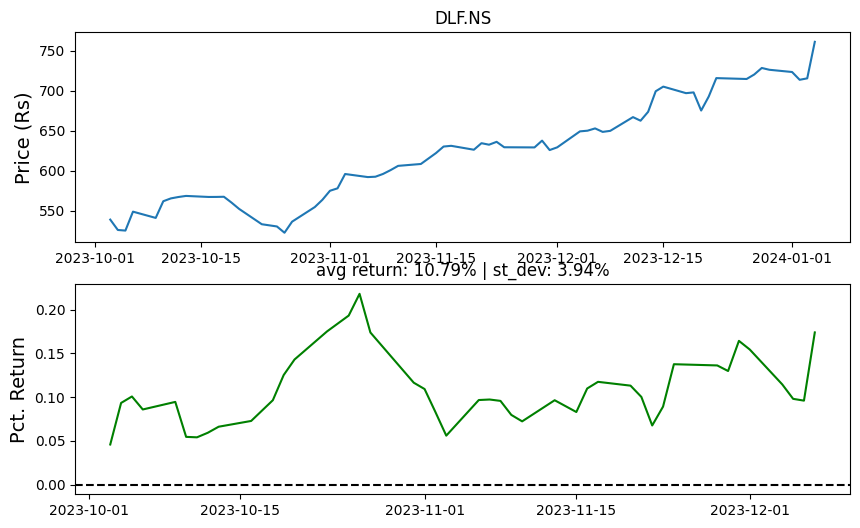

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.016692859844753657 | dev_return : 0.061257344827154586
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.014579917503438657 | dev_return : 0.034090754319722576
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.06643165730869276 | dev_return : 0.06999025719439987
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.02952674312619856 | dev_return : 0.04804469369656985
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.0681520755508816 | dev_return : 0.04426342285321845
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.024851978558758047 | dev_return : 0.03360985301591474
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08672581654557644 | dev_return : 0.08015605998498787
[*********************100%%*********

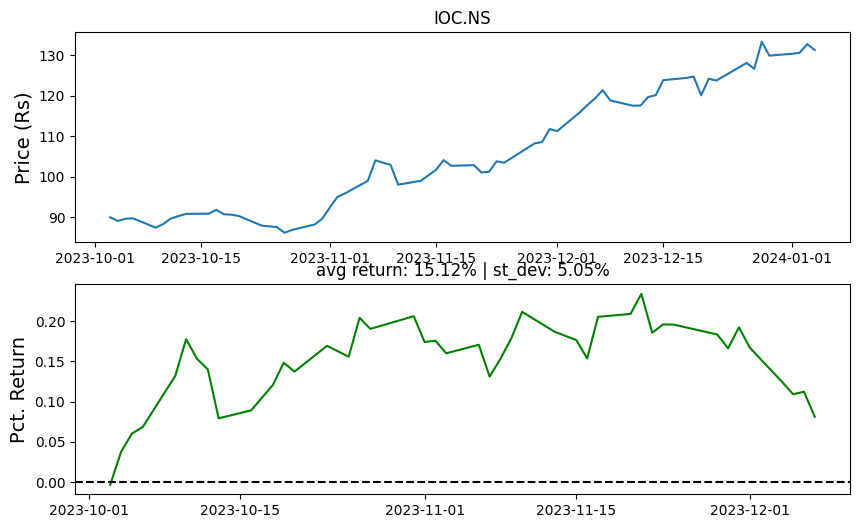

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.09145378915799318 | dev_return : 0.11173774083765184
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.025449746873606655 | dev_return : 0.08551371108669724
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.024126549728144254 | dev_return : 0.04811306512381555
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.03892524595044996 | dev_return : 0.025023672098416588
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08380357881099416 | dev_return : 0.044427002378860485
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.028346324859579566 | dev_return : 0.05236590291402291
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.07176381860813863 | dev_return : 0.052964997311819466
[*********************100%%*******

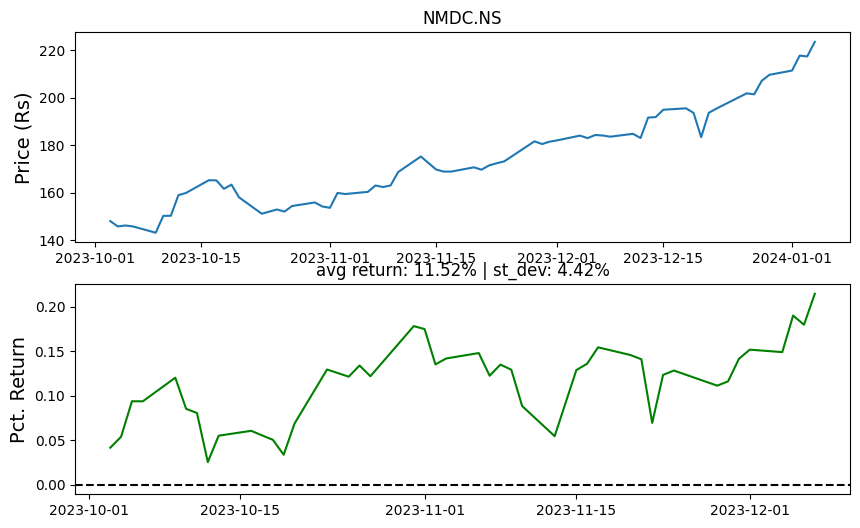

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.10900146860989798 | dev_return : 0.0793902440437607
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.11026662251922227 | dev_return : 0.08809376388089889
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.04112922297369161 | dev_return : 0.02649472049867005
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.020988253059073172 | dev_return : 0.03505506236888867
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.006145938630983305 | dev_return : 0.029112582063745597
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08848224062317421 | dev_return : 0.04613927850197995
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.009733780680781677 | dev_return : 0.10313236802026328
[*********************100%%*********

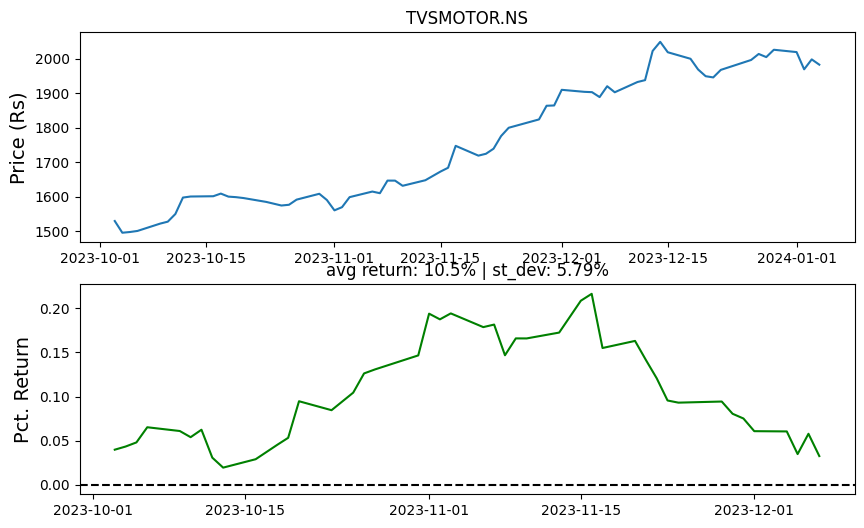

[*********************100%%**********************]  1 of 1 completed
avg_return : 0.08407811522695142 | dev_return : 0.04760145183077997
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.04255341599415932 | dev_return : 0.03753293128833721
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.021280547073021912 | dev_return : 0.027357204192399783
[*********************100%%**********************]  1 of 1 completed
avg_return : -0.005134400055095098 | dev_return : 0.07163018968082824
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.05985634313278505 | dev_return : 0.03424774488876775
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.09992913991669604 | dev_return : 0.12638790107323775
[*********************100%%**********************]  1 of 1 completed
avg_return : 0.04099349219880746 | dev_return : 0.07902500492047787
[*********************100%%**********

In [20]:
for ticker in tickers:
    avg_return, dev_return, all_returns = stock_analysis(ticker, startdate, enddate, return_period_weeks)
    print('avg_return : {} | dev_return : {}'.format(avg_return,dev_return))
    if(avg_return > min_avg_return and dev_return < max_st_dev):
        title_price = '%s'%(ticker)
        title_return= 'avg return: %s%% | st_dev: %s%%'%(round(avg_return * 100,2),round(dev_return * 100,2))
        plot_analysis([title_price,title_return],ticker,startdate,enddate,all_returns)